In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

#### Specifiy csv file

In [2]:
df = pd.read_csv('./1DO-1DS/1DO-1DS_max_grad_norm.csv')

#### Getting and preparing data

In [10]:
dp = df.loc[df['dp_used'] == True]
no_dp = df.loc[df['dp_used'] == False]

dp_lrs = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
no_dp_lrs = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

# Works for test_accs, test_losses, epsilons and alphas
def get_avg_values(col):
    dp_data = []
    no_dp_data = []

    for dp_lr, no_dp_lr in zip(dp_lrs, no_dp_lrs):
        dp_series = np.vstack(dp.loc[dp['max_grad_norm'] == dp_lr][col].apply(literal_eval))
        #no_dp_series = np.vstack(no_dp.loc[no_dp['max_grad_norm'] == no_dp_lr][col].apply(literal_eval))

        dp_mean = np.mean(dp_series, axis=0)
        #no_dp_mean = np.mean(no_dp_series, axis=0)

        dp_data.append(dp_mean)
        #no_dp_data.append(no_dp_mean)
        
    return dp_data#, no_dp_data
        
dp_data_loss = get_avg_values('test_losses')
dp_data_acc = get_avg_values('test_accs')

In [12]:
print(dp_data_acc)

[array([0.1669903 , 0.27475728, 0.39708738, 0.67961165, 0.69708736,
       0.71553398, 0.67281554, 0.78446602, 0.80485437, 0.77475727,
       0.81941748, 0.82233009, 0.86116505, 0.86019418, 0.85533981,
       0.8553398 , 0.8446602 , 0.86990292, 0.8446602 , 0.85728157,
       0.84563107, 0.82524271, 0.85436894, 0.80194175, 0.80582523,
       0.79029127, 0.8262136 , 0.80679612, 0.80776701, 0.79805825]), array([0.1592233 , 0.20970874, 0.4407767 , 0.71747572, 0.72330097,
       0.75048544, 0.72038834, 0.8145631 , 0.86019417, 0.83980583,
       0.85922331, 0.84174758, 0.85436894, 0.84077669, 0.84368933,
       0.85728154, 0.84660194, 0.85825243, 0.83106797, 0.82912621,
       0.80194175, 0.80388349, 0.85436894, 0.82524272, 0.81747572,
       0.80194174, 0.79708737, 0.79611651, 0.84660193, 0.78155341]), array([0.16796117, 0.26699029, 0.3961165 , 0.66019418, 0.72912623,
       0.77766991, 0.75436894, 0.81941746, 0.8553398 , 0.81165049,
       0.85145631, 0.83398058, 0.86116506, 0.85436894, 0.

#### Plotting data

In [39]:
y = np.arange(30) + 1 

def make_plot(data, variable, xlabel='', ylabel='', title='', path=''):
    fig, ax = plt.subplots()
    for X, var in zip(data, variable):
        ax.plot(y, X, '--', label=var)
    ax.set(xlabel=xlabel, ylabel=ylabel , title=title)
    plt.legend()
    
    if path:
        fig.savefig(path)
    
    plt.show()

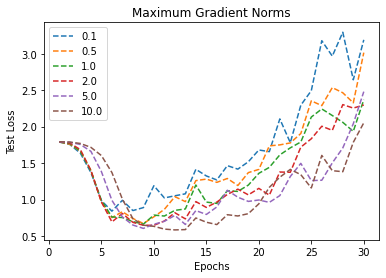

In [67]:
make_plot(dp_data_loss, dp_lrs, xlabel="Epochs", ylabel="Test Loss",
        title="Maximum Gradient Norms", path="./1DO-1DS/FL_DP_max_grad_norm_losses.jpg")

# make_plot(no_dp_data, no_dp_lrs, xlabel="Epochs", ylabel="Test Loss", 
#           title="Test Loss by Learning Rate (FL)", path="./1DO-1DS/FL_test_loss_lr.jpg")


[0.8699029207229614, 0.8601941704750061, 0.8650485634803772, 0.8762135903040568, 0.8757281541824341, 0.8825242638587951]
[18, 9, 16, 21, 13, 13]


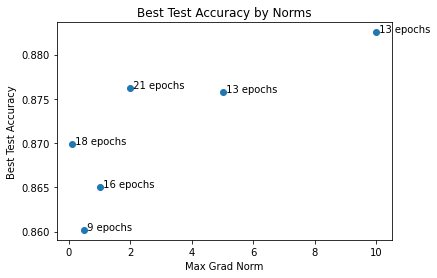

In [66]:
maxes = [np.max(dp_data_acc[i]) for i in range(len(dp_data_acc))]
epochs = [np.argmax(data) + 1  for data in dp_data_acc]
n = [f' {epoch} epochs' for epoch in epochs]

print(maxes)
print(epochs)

fig, ax = plt.subplots()
ax.scatter(dp_lrs, maxes)
ax.set(xlabel="Max Grad Norm", ylabel="Best Test Accuracy", title="Best Test Accuracy by Norms")

for i, txt in enumerate(n):
    ax.annotate(txt, (dp_lrs[i], maxes[i]))

path = "./1DO-1DS/FL_DP_max_grad_norm_comparison.jpg"

if path:
    fig.savefig(path)

plt.show()

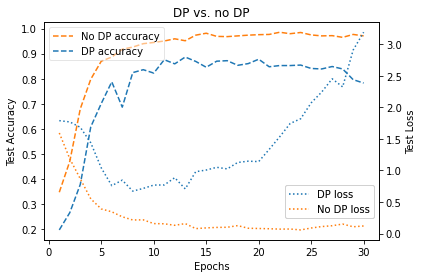

In [68]:
y = np.arange(30) + 1

data_acc = [dp_data_acc[3], no_dp_data_acc[3]]
variable_acc = ["DP", "no DP"]

data_loss = [dp_data_loss[3], no_dp_data_loss[3]]
variable_loss = ["DP Loss", "No DP Loss"]

fig, ax = plt.subplots()
for X, var in zip(data_acc, variable_acc):
    ax.plot(y, X, '--', )
ax.set(xlabel='Epochs', ylabel='Test Accuracy' , title='DP vs. no DP')

ax2 = ax.twinx()

for X, var in zip(data_loss, variable_loss):
    ax2.plot(y, X, ':', )
ax2.set(ylabel='Test Loss')

lines1 = ax.get_lines()
lines2 = ax2.get_lines()
legend1 = plt.legend([lines1[1], lines1[0]], ["No DP accuracy", "DP accuracy"], loc=2, framealpha=0.5)
legend2 = plt.legend([line for line in lines2], ["DP loss", "No DP loss"], loc=(0.72, 0.1))
fig.add_artist(legend1)
fig.add_artist(legend2)

#plt.savefig('./1DO-1DS/DP_vs_NODP.jpg')

plt.show()

